### Setup

In [1]:
##Matplot lib and use the `nbagg` backend DELETE THIS COMMENT.
import matplotlib
matplotlib.use('nbagg') #DELETE?
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
# Create an engine for the `emoji.sqlite` database
#http://docs.sqlalchemy.org/en/latest/core/engines.html - echo is false so that we don't have logging.
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

## Reflect database and Query

In [4]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station

In [5]:
Measurement = Base.classes.measurement

In [6]:
# Start a session to query the database
session = Session(engine)

### Inspector

In [7]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

measurement_id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

station_id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


### Precipitation Analysis

In [10]:
from sqlalchemy import Date, cast
from datetime import datetime,timedelta, date #as dt
from dateutil.relativedelta import relativedelta
import matplotlib.dates as dts
#from datetime import datetime
import datetime as dt
from dateutil.relativedelta import relativedelta

In [11]:
# Latest Date, this is my vacation end date
#latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = session.query(Measurement.date).\
filter(Measurement.station == 'USC00511918').\
order_by(Measurement.date.desc()).first()
print(latest_date)

# filter(Measurement.station == 'USC00511918').\
# order_by(Measurement.date.desc()).first()

('2015-10-30',)


In [12]:
#Date 12 months ago
y = int(latest_date[0][:4])
m = int(latest_date[0][5:7])
d = int(latest_date[0][8:10])
print(y)
print(m)
print(d)
start_date = dt.date(y, m, d) - dt.timedelta(days = 365)
print(start_date)

2015
10
30
2014-10-30


In [13]:
session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).all()

[('2014-10-30', 0.05),
 ('2014-10-31', 0.02),
 ('2014-11-01', 0.04),
 ('2014-11-02', 0.0),
 ('2014-11-03', 0.0),
 ('2014-11-04', 0.0),
 ('2014-11-05', 0.14),
 ('2014-11-06', 0.1),
 ('2014-11-07', 0.0),
 ('2014-11-08', 0.09),
 ('2014-11-09', 0.0),
 ('2014-11-10', 0.0),
 ('2014-11-11', 0.0),
 ('2014-11-12', 0.05),
 ('2014-11-13', 0.0),
 ('2014-11-14', 0.0),
 ('2014-11-15', 0.62),
 ('2014-11-16', 0.01),
 ('2014-11-17', 0.0),
 ('2014-11-18', 0.0),
 ('2014-11-19', 0.0),
 ('2014-11-20', 0.08),
 ('2014-11-21', 0.0),
 ('2014-11-22', 0.0),
 ('2014-11-23', 0.0),
 ('2014-11-24', 0.04),
 ('2014-11-25', 0.0),
 ('2014-11-26', 0.0),
 ('2014-11-27', 0.0),
 ('2014-11-28', 0.0),
 ('2014-11-29', 0.0),
 ('2014-11-30', 0.01),
 ('2014-12-01', 0.0),
 ('2014-12-02', 0.02),
 ('2014-12-03', 0.15),
 ('2014-12-04', 0.09),
 ('2014-12-05', 0.0),
 ('2014-12-06', 0.0),
 ('2014-12-07', 0.0),
 ('2014-12-08', 0.0),
 ('2014-12-09', 0.0),
 ('2014-12-10', 0.0),
 ('2014-12-11', 0.05),
 ('2014-12-12', 0.01),
 ('2014-12-13', 

### Graph Precipitation Analysis

In [14]:
pastyr = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).all()

In [15]:
# create empty dict to populate
data = {'date': [], 'prcp': []}

# populate dict with rows from results
for row in pastyr:
    data['date'].append(row.date)
    data['prcp'].append(row.prcp)

#print(pastyr)
precip_df = pd.DataFrame(pastyr)
precip_df  = precip_df.set_index('date')
# create pandas df from dict
#precip_df = pd.DataFrame(data['date','prcp'], columns = ['date','prcp'], index = data['date'])

#precip_df  = precip_df.set_index('date')
precip_df.head()

,prcp
date,
2014-10-30,0.05
2014-10-31,0.02
2014-11-01,0.04
2014-11-02,0.00
2014-11-03,0.00


In [16]:
import os

<IPython.core.display.Javascript object>


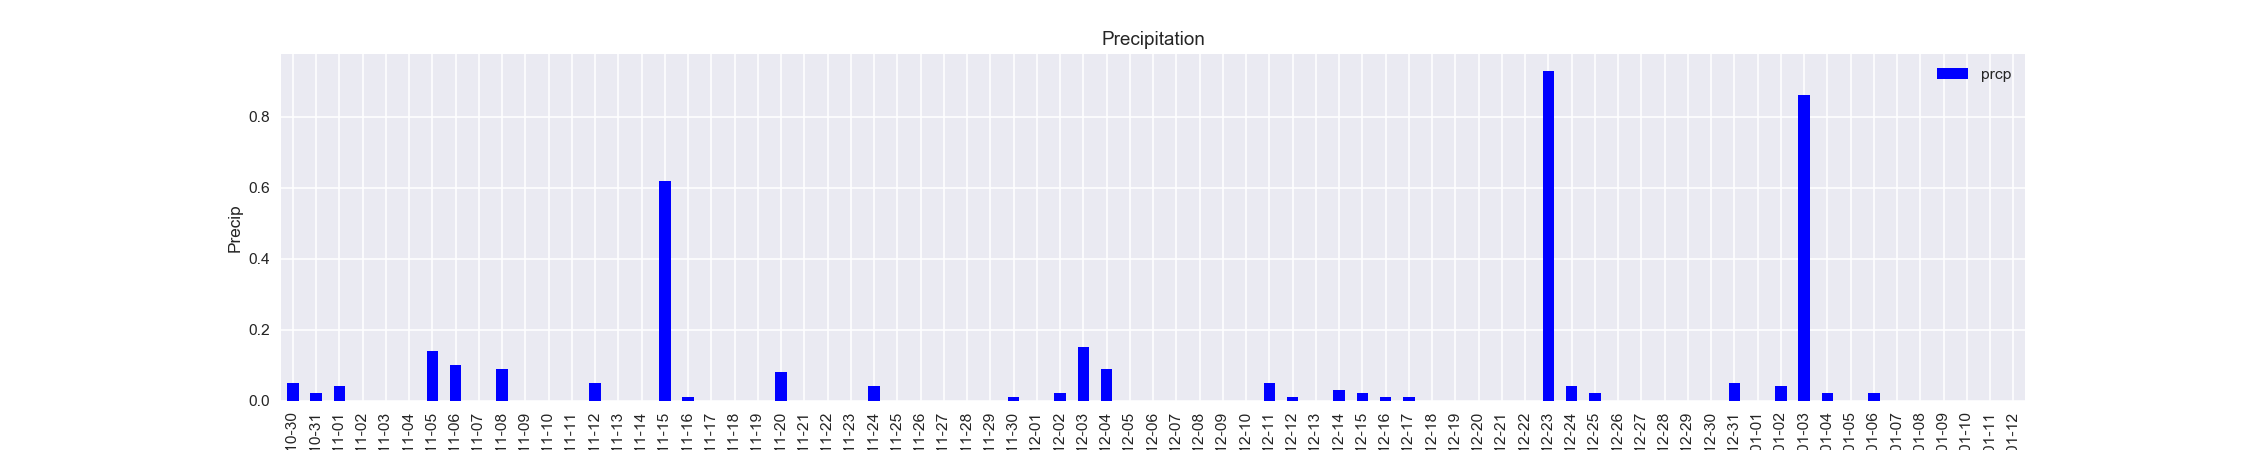

In [17]:
precip_df = precip_df.reset_index()

#For clarity plotting only 75 rows in the data frame
summary_df = precip_df.head(75)
summary_df.plot.bar(x='date', y='prcp', color=['blue'],
                                 align='center', figsize=(20, 4))


plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Precip")
plt.savefig(os.path.join('Images/precipitationanalysis.png'))

plt.show()

In [64]:
#Use Pandas to print the summary statistics for the precipitation data.
#precip_df.describe
precip_df['prcp'].describe()

count    5923.000000
mean        0.182352
std         0.478900
min         0.000000
25%         0.000000
50%         0.020000
75%         0.140000
max         9.640000
Name: prcp, dtype: float64

### Station Analysis

In [18]:
#Query to calculate the total number of stations
session.query(Station).count()

9

In [19]:
#print(session.query(Measurement.station).group_by(Measurement.station).all())
from sqlalchemy import func
from sqlalchemy import desc

# Design a query to find the most active stations. List the stations and observation counts in descending order
##Count the number of times each station is in the CSV. Order by descending. 

session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(desc(func.count(Measurement.station))).all()

#An alternative is below which gives the same output:
engine.execute("select station, COUNT(station) from Measurement GROUP BY station ORDER BY COUNT(station) DESC").fetchall()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [20]:
# Which station has the highest number of observations?
engine.execute("select station, COUNT(station) from Measurement GROUP BY station ORDER BY COUNT(station) DESC limit 1").fetchall()

[('USC00519281', 2772)]

In [21]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
#engine.execute("select tobs from Measurement where date(date) >= date("now", "-365 day")")
year_ago = dt.date.today() - dt.timedelta(days=365)
print(year_ago)

pastyr_tobs = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date>=year_ago).all()
pastyr_tobs

2017-04-27


[('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 72.0),
 ('USC00519397', 63.0),
 ('USC00519397', 75.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 73.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 77.0),
 ('USC00519397', 87.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 74.0),
 ('USC00519397', 76.0),
 ('USC00519397', 75.0),
 ('USC00519397', 76.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397',

In [22]:
# Filter by the station with the highest number of observations.
##USC00519281 was the station with the highest number of observations, which was shown in the output above. 
highest_tobs = session.query(Measurement.tobs).filter(Measurement.date>=year_ago).filter(Measurement.station=="USC00519281").all()
highest_tobs
## Find thos players from the USA who were born after 1989
# born_after_ninties = session.query(BaseballPlayer).\
#     filter(BaseballPlayer.birth_year > 1989).filter(BaseballPlayer.birth_country == "USA").\
#     count()

[(70.0),
 (67.0),
 (72.0),
 (60.0),
 (65.0),
 (75.0),
 (70.0),
 (75.0),
 (70.0),
 (79.0),
 (75.0),
 (70.0),
 (67.0),
 (74.0),
 (70.0),
 (75.0),
 (76.0),
 (77.0),
 (74.0),
 (74.0),
 (74.0),
 (69.0),
 (68.0),
 (76.0),
 (74.0),
 (71.0),
 (71.0),
 (74.0),
 (74.0),
 (74.0),
 (74.0),
 (80.0),
 (74.0),
 (72.0),
 (75.0),
 (80.0),
 (76.0),
 (76.0),
 (77.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (72.0),
 (74.0),
 (74.0),
 (74.0),
 (76.0),
 (74.0),
 (75.0),
 (73.0),
 (79.0),
 (75.0),
 (72.0),
 (72.0),
 (74.0),
 (72.0),
 (72.0),
 (77.0),
 (71.0),
 (73.0),
 (76.0),
 (77.0),
 (76.0),
 (76.0),
 (79.0),
 (81.0),
 (76.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (78.0),
 (78.0),
 (69.0),
 (72.0),
 (74.0),
 (74.0),
 (76.0),
 (80.0),
 (80.0),
 (76.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (82.0),
 (75.0),
 (77.0),
 (75.0),
 (76.0),
 (81.0),
 (82.0),
 (81.0),
 (76.0),
 (77.0),
 (82.0),
 (83.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (76.0),
 (79.0)]

In [23]:
# Plot the results as a histogram with bins=12.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##First, add the results from highest_tobs into a Pandas dataframe to plot.
columns = ['tobs']
tobs_df = pd.DataFrame([x for x in highest_tobs], columns=columns)
##Reset index since the output above gives a sequential ID and tobs values.
tobs_df = tobs_df.set_index('tobs')
tobs_df.head(5)

""
tobs
70.0
67.0
72.0
60.0
65.0


In [24]:
tobs_df = tobs_df.reset_index()

In [25]:
#Test plot.
df.plot.hist(bins=20)
plt.show()

NameError: name 'df' is not defined

<IPython.core.display.Javascript object>


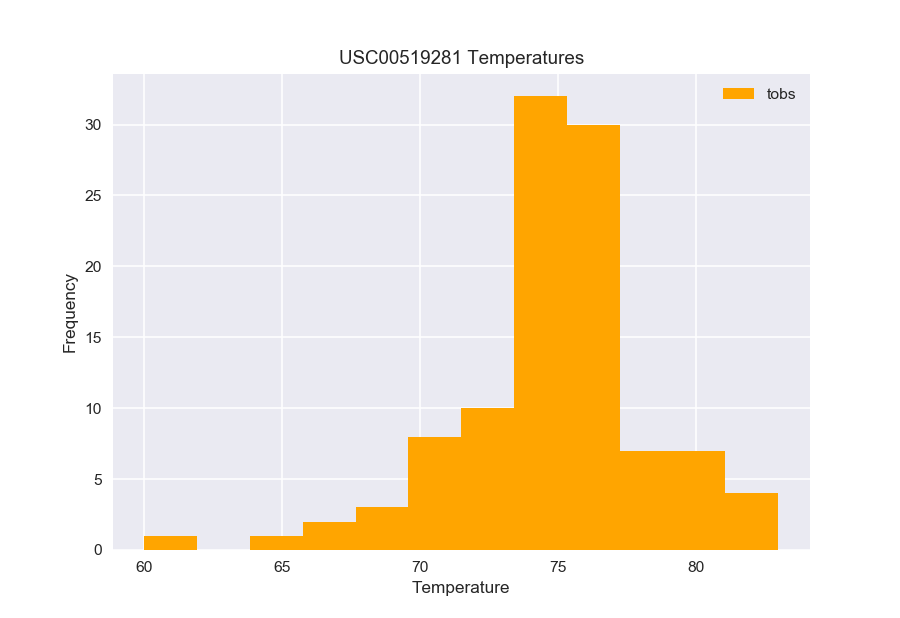

In [26]:
##Use matplot lib for plotting a histogram from the dataframe.
#tobs_df = tobs_df.reset_index()
#df.plt.hist(bins =20, color=['gold'])
#kind = 'hist'
tobs_df.plot.hist(bins =12, color=['orange'])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'])
## plt.xticks(range(0, 7))
## plt.yticks(range(1, 20))
plt.title('USC00519281 Temperatures')
plt.show()

### Temperature Analysis

In [27]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and 
##return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date,end_date):
    
    return session.query(func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).\
           filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
print(calc_temps('2017-01-15', '2017-01-30'))

[(70.55681818181819, 63.0, 80.0)]


In [36]:
import datetime as datetime
trip_arrive = datetime.date(2018, 4, 20)
trip_leave = datetime.date(2018, 4, 27)
last_year = datetime.timedelta(days = 365)
temp_avg_1st_year = calc_temps((trip_arrive - last_year), (trip_leave - last_year))
print(temp_avg_1st_year)

[(74.4186046511628, 68.0, 81.0)]


<IPython.core.display.Javascript object>


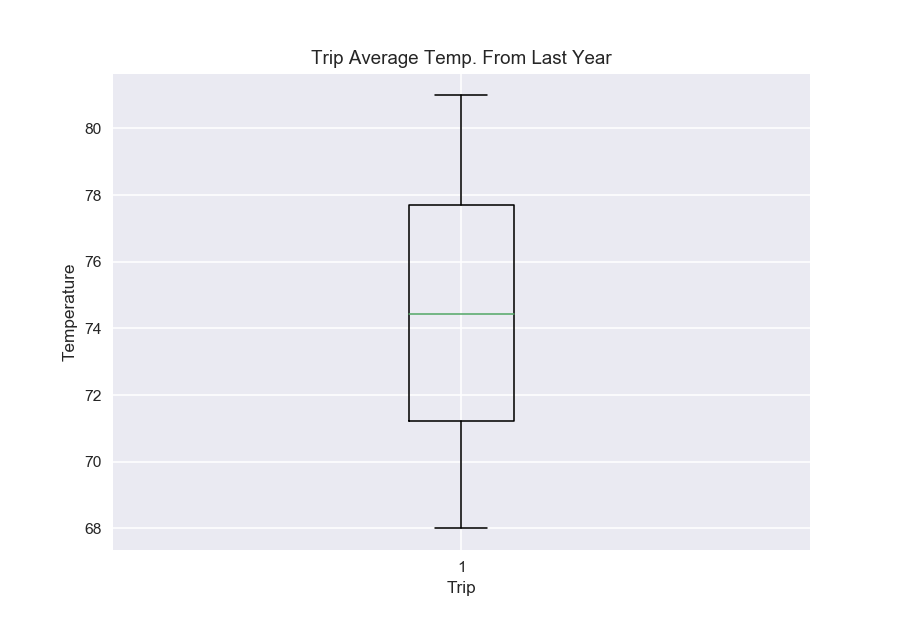

In [37]:
fig, ax = plt.subplots()
x = range(len(temp_avg_1st_year))
ax.boxplot(temp_avg_1st_year)
ax.set_title("Trip Average Temp. From Last Year")
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")

plt.show()

### Testing

In [19]:
maximumdate = session.query(func.max(Measurement.date))
#lastyearmaxdt = maximumdate - relativedelta(months=12)

In [20]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [23]:
query_begin_date = session.query(Measurement.date).order_by(Measurement.date.desc()).filter (Measurement.station =='USC00511918').first()
print(query_begin_date)

('2015-10-30',)


In [27]:
print(latest_date)
#session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2017-01-01')

('2015-10-30',)


In [28]:
datetime.strftime

<method 'strftime' of 'datetime.date' objects>

In [31]:
# start_date = session.query(Measurements.date).\
# filter(Measurements.station == 'USC00511918').\
# order_by(Measurements.date.asc()).first()

# start_date = latest_date - str(365)
# .strftime('%Y-%m-%d')
# start_date = session.query(date(Measurements.date, '+365 day'))

#start_date = dlatest_date(y, m, d) - dt.timedelta(days = 365)
start_date = dt.date(y, m, d) - dt.timedelta(days = 365)
print(start_date)

2014-10-30


In [70]:
from datetime import datetime, timedelta
futuredate = datetime.now() + timedelta(days=10)

In [32]:
   #current_time = datetime.now()
# current_time = datetime.now()
# past_year = current_time - datetime.timedelta(days=365)
#past_year = latest_date - datetime.timedelta(days=365)

#     measurements_year = session.query(Measurements.date,Measurements.prcp).filter(
#         Measurements.date > past_year).all()

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

In [33]:
# datetime_obj = datetime.strptime(latest_date, "%Y-%m-%d")
# datetime_obj                            

In [85]:
# Designed a query to retrieve the last 12 months of precipitation data.
# precip = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= today()-365)
# '2017-01-01')
# precip = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2017-01-01')
#Max date is 8/23/2017.
precip = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2016-08-23')

#LAST TRY:
# precip = session.query(Measurements.date, Measurements.prcp).\
#    filter(Measurements.date>= start_date).all()

# precip = session.query(Measurements.date, Measurements.prcp).filter(cast(date.date_time,Date)>= today()-365)
#https://stackoverflow.com/questions/7075828/make-sqlalchemy-use-date-in-filter-using-postgresql

# my_data = session.query(MyObject).\
# filter(cast(MyObject.date_time,Date) == date.today()).all()

In [87]:
precip

In [26]:
# from sqlalchemy import Date, cast
# from datetime import datetime

lastyrdt = datetime.now().date() 
lastyrdt 
# https://stackoverflow.com/questions/16228195/comparing-dates-with-sqlalchemy-sqlite
#query.filter(cast(Model.created_at, Date) == cast(created_at,Date))

datetime.date(2018, 4, 22)

In [36]:
# from datetime import strftime 
import time

In [38]:
testdt = time.strftime('%Y-%m-%d',Measurements.date) >= date('now','-365 days')
testdt
# TypeError: Tuple or struct_time argument required

TypeError: Tuple or struct_time argument required

In [42]:
latest_date = session.query(Measurements.date).\
order_by(Measurements.date.desc()).first()

In [45]:
# print(latest_date)

# ldt = pd.read_sql_query(latest_date, session.bind)
# ldt

In [86]:
# create empty dict to populate
data = {'date': [], 'precip': []}

# populate dict with rows from results
for row in precip:
    data['date'].append(row.date)
    data['prcp'].append(row.precip)

# create pandas df from dict
precip_df = pd.DataFrame(data['precip'], columns = ['prcp'], index = data['date'])
precip_df.head()

,prcp
